In [5]:
import pandas as pd
import numpy as np

import json


def significance_code(value):
    if value <= 0.001:
        return "***"
    elif value <= 0.01:
        return "**"
    elif value <= 0.05:
        return "*"
    elif value <= 0.1:
        return "."
    else:
        return ""


file_path = "./output_all.json"

with open(file_path, "r") as file:
    data = json.load(file)
    df = pd.DataFrame(data)


res = df[["coefMat"]]
cols = ["Estimate", "Std. Error", "z-value", "Pr(>|z|)"]
rows = ["indeg", "outdeg", "inertia", "recip", "trans"]
total = pd.DataFrame()
for i in range(len(data)):
    data = res.iloc[i, 0]
    arr = np.array(data)
    dff = pd.DataFrame(arr, columns=cols)
    dff["Measure"] = rows
    dff["starts"] = dff["Pr(>|z|)"].apply(significance_code)

    dff["Group"] = str(i)
    dff.set_index("Group")

    total = pd.concat([dff, total], axis=0)

total.set_index("Group", append=True, inplace=True)
total.set_index("Measure", append=True, inplace=True)

In [7]:
measure_list = ["indeg", "outdeg", "inertia", "recip", "trans"]

for measure in measure_list:
    group_data = total.loc[total.index.get_level_values("Measure") == measure]

In [13]:
total

,,,Estimate,Std. Error,z-value,Pr(>|z|),starts
,Group,Measure,,,,,
0,19,indeg,-0.0526,0.0204,-2.5791,9.900000e-03,**
1,19,outdeg,0.0094,0.0172,0.5440,5.864000e-01,
2,19,inertia,0.0050,0.0549,0.0912,9.273000e-01,
3,19,recip,1.1076,0.0554,20.0007,0.000000e+00,***
4,19,trans,0.2902,0.0252,11.4980,0.000000e+00,***
...,...,...,...,...,...,...,...
0,0,indeg,-0.1445,0.0258,-5.6096,2.028500e-08,***
1,0,outdeg,0.0741,0.0204,3.6228,3.000000e-04,***
2,0,inertia,0.3576,0.0639,5.5998,2.146600e-08,***


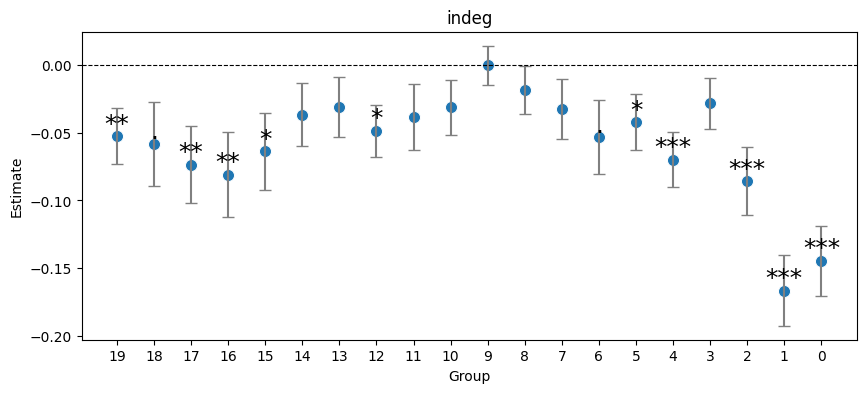

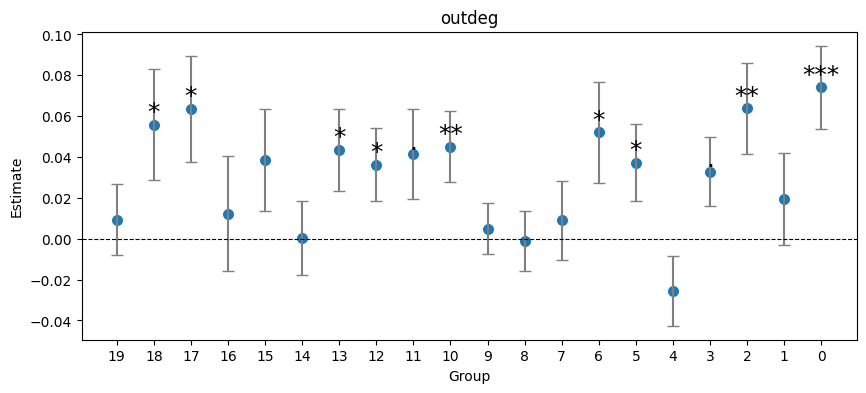

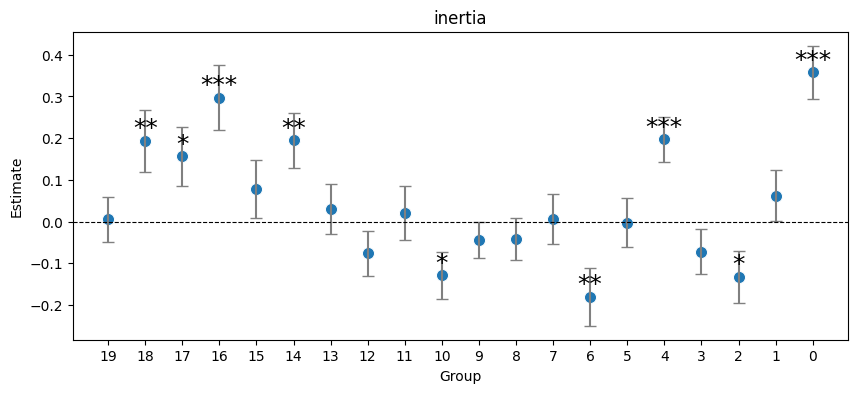

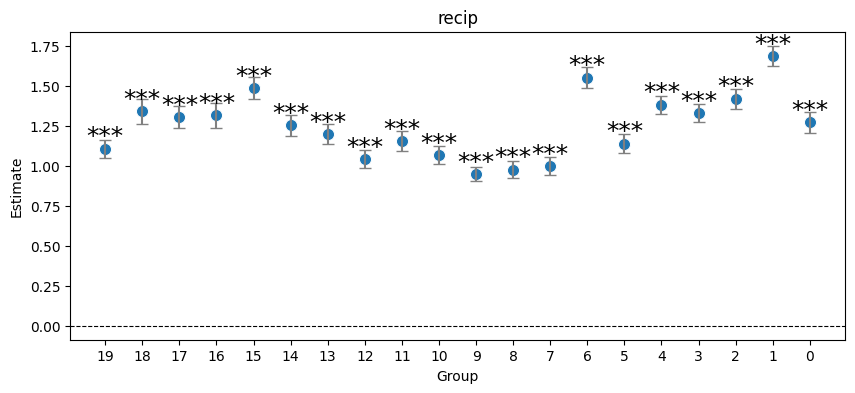

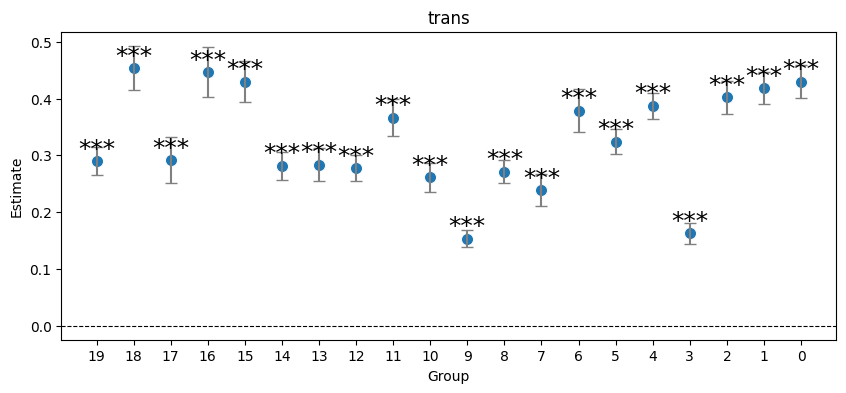

In [32]:
df = total.reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

measures = df["Measure"].unique()

for measure in measures:
    df_measure = df[df["Measure"] == measure]
    plt.figure(figsize=(10, 4))
    ax = sns.scatterplot(data=df_measure, x="Group", y="Estimate", s=75)
    plt.errorbar(
        df_measure["Group"], df_measure["Estimate"], yerr=df_measure["Std. Error"], fmt="none", c="gray", capsize=4
    )

    for i in range(len(df_measure)):
        plt.text(
            df_measure["Group"].iloc[i],
            df_measure["Estimate"].iloc[i],
            df_measure["starts"].iloc[i],
            ha="center",
            va="bottom",
            fontsize=18,
        )

    plt.axhline(y=0, color="black", linestyle="--", linewidth=0.8)
    plt.xlabel("Group")
    plt.ylabel("Estimate")
    plt.title(f"{measure}")
    plt.show()